### Read dataset

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
data= pd.read_csv(r'D:\Final Project\Zihan\data_final.csv')
#data['label']=np.nan
#data.loc[(data['intensity']>=2) & (data['emotion']=='Fear'), 'label'] = 1
#data.loc[(data['intensity']>=0) & (data['emotion']=='Sadness'), 'label'] = 2
#data.loc[(data['intensity']>=0) & (data['emotion']=='Happiness'), 'label'] = 3
data.fillna(0,inplace = True)
#data[(data['intensity']>=5) & (data['emotion']==1)].shape
#data.to_csv('D:\Final Project\Zihan\data_3.csv')
data

,sound_ID,emotion,intensity,Ave,Max,Min,range,Std,Grow_rate,temp
0,0153_2,Fear,3,59.000000,60,58,2.000000,1.000000,0.034483,-0.641150
1,0221_2,Fear,4,59.500000,60,59,1.000000,0.707107,0.016949,-0.641150
2,0226_2,Sadness,4,60.333333,62,59,3.000000,1.527525,0.050847,-0.651150
3,0234_2,Sadness,3,63.000000,63,63,0.000000,0.000000,0.000000,-0.651150
4,0235_2,Sadness,2,61.000000,62,60,2.000000,1.000000,0.033333,-0.651150
...,...,...,...,...,...,...,...,...,...,...
433,0811_2,Fear,4,97.500000,98,97,0.707107,1.000000,0.010309,1.464936
434,0886_2,Happiness,7,83.000000,86,80,4.242641,6.000000,0.075000,1.464936
435,0890_2,Fear,3,78.500000,80,77,2.121320,3.000000,0.038961,1.464936
436,1027_2,Happiness,3,75.000000,76,74,1.414214,2.000000,0.027027,1.489936


### T-test

In [ ]:
# Average HR Grouped by 3 emotions, and intensity of emotion can be chosen manually.
data_happy = data.loc[(data['emotion']=='Happiness')& (data['intensity']>=1)]['Ave']
data_sad = data.loc[(data['emotion']=='Sadness')& (data['intensity']>=1)]['Ave']
data_fear = data.loc[(data['emotion']=='Fear')& (data['intensity']>=1)]['Ave']

In [ ]:
from scipy import stats
import numpy as np
import scipy.stats

request_a = np.array(data_happy)
request_b = np.array(data_sad)
request_c = np.array(data_fear)

# conduct T-test between average HR in different emotion groups with different intensity
t, pval = scipy.stats.ttest_ind(request_a, request_c)
#t, pval = scipy.stats.ttest_ind(request_a, request_b)
#t, pval = scipy.stats.ttest_ind(request_b, request_c)
print(t,pval)

### SMOTE algorithm over sample

In [2]:
import pandas as pd
import numpy as np
from collections import Counter
data= pd.read_csv(r'D:\Final Project\Zihan\data_final.csv')
 
from sklearn.neighbors import NearestNeighbors
import numpy as np
import random 
 
class Smote:
    """
    SMOTE Oversample algorithm.
    Parameters:
    -----------
    k: int
        The number of selected neighbors.
    sampling_rate: int
        Sampling ratio, attention sampling_rate < k.
    newindex: int
        The index number of the generated new sample (synthetic sample).
    """
    def __init__(self, sampling_rate=5, k=5):
        self.sampling_rate = sampling_rate
        self.k = k
        self.newindex = 0
 
    def fit(self, X, y=None):
        if y is not None:
            negative_X = X[y == 0]
            X = X[y == 1]
 
        n_samples, n_features = X.shape
        # Initializes a matrix to store synthetic samples
        self.synthetic = np.zeros((n_samples * self.sampling_rate, n_features))
 
        # Find the k neighbors of each sample in the positive sample set (dataset X) in dataset X 
        knn = NearestNeighbors(n_neighbors=self.k).fit(X)
        for i in range(len(X)):
            k_neighbors = knn.kneighbors(X[i].reshape(1, -1),return_distance=False)[0]
            # In the positive class samples set, each sample is generated according to its k neighbors 
           
            self.synthetic_samples(X, i, k_neighbors)
 
        if y is not None:
            return (np.concatenate((self.synthetic, X, negative_X), axis=0),
                    np.concatenate(([1] * (len(self.synthetic) + len(X)), y[y == 0]), axis=0))
 
        return np.concatenate((self.synthetic, X), axis=0)
 
    # For each sample in the positive class samples set, sampling_rate new samples are generated respectively according to its k neighbors 
    def synthetic_samples(self, X, i, k_neighbors):
        for j in range(self.sampling_rate):
            #  select k_neighbors randomly 
            neighbor = np.random.choice(k_neighbors)
            # 计算样本X[i]与刚刚选择的近邻的差
            diff = X[neighbor] - X[i]
            #  Generate new data sample
            self.synthetic[self.newindex] = X[i] + random.random() * diff
            self.newindex += 1
 

import pandas as pd
import csv
 

df= pd.read_csv(r'D:\Final Project\Zihan\data_final.csv')
df['label']=np.nan
df.loc[(df['intensity']>=2) & (df['emotion']=='Fear'), 'label'] = 1
df.fillna(0,inplace = True)
df = df.iloc[:,3:11]
data = []
for i, element in enumerate(df['label']):
    if element == 1:
        data.append(df.iloc[i, :])
 
X = np.array(data)

smote = Smote(sampling_rate=1, k=6)
#data1=smote.fit(X)
data1=smote.fit(X).tolist()

df2w = pd.DataFrame(data1[0:],columns=['Ave','Max','Min','range','Std','Grow_rate','temp','label'])
data_oversample = pd.concat([df,df2w])
data_oversample
#data_oversample[data_oversample['label']==0]

,Ave,Max,Min,range,Std,Grow_rate,temp,label
0,59.000000,60.0,58.0,2.000000,1.000000,0.034483,-0.641150,1.0
1,59.500000,60.0,59.0,1.000000,0.707107,0.016949,-0.641150,1.0
2,60.333333,62.0,59.0,3.000000,1.527525,0.050847,-0.651150,0.0
3,63.000000,63.0,63.0,0.000000,0.000000,0.000000,-0.651150,0.0
4,61.000000,62.0,60.0,2.000000,1.000000,0.033333,-0.651150,0.0
...,...,...,...,...,...,...,...,...
241,97.000000,97.0,97.0,0.000000,0.000000,0.000000,1.464936,1.0
242,96.500000,97.0,96.0,0.707107,1.000000,0.010417,1.464936,1.0
243,97.500000,98.0,97.0,0.707107,1.000000,0.010309,1.464936,1.0
244,78.500000,80.0,77.0,2.121320,3.000000,0.038961,1.464936,1.0


## normalization


### 1.Z_score

In [5]:
X=np.array(data_oversample.iloc[:,0:7])

Y=np.array(data_oversample['label'])
X
from sklearn import preprocessing
import numpy as np
from sklearn import preprocessing

zscore = preprocessing.StandardScaler()
# 实例化Z-Score标准化方法
X_zscores = zscore.fit_transform(X)
# 对数据进行标准化操作
X_zscores.shape


(684, 7)

In [9]:
data_oversample['Ave']= X_zscores[:,0]
data_oversample['Max']=X_zscores[:,1]
data_oversample['Min']=X_zscores[:,2]
data_oversample['range']=X_zscores[:,3]
data_oversample['Std']=X_zscores[:,4]
data_oversample['Grow_rate']=X_zscores[:,5]
data_oversample['temp']=X_zscores[:,6]
data_oversample

,Ave,Max,Min,range,Std,Grow_rate,temp,label
0,-1.148811,-1.136495,-1.158075,0.318330,-0.158889,0.429349,-0.763976,1.0
1,-1.115855,-1.136495,-1.092270,-0.297671,-0.363048,-0.243819,-0.763976,1.0
2,-1.060928,-1.004917,-1.092270,0.934332,0.208818,1.057640,-0.774208,0.0
3,-0.885163,-0.939127,-0.829052,-0.913673,-0.855931,-0.894549,-0.774208,0.0
4,-1.016987,-1.004917,-1.026466,0.318330,-0.158889,0.385219,-0.774208,0.0
...,...,...,...,...,...,...,...,...
241,1.355848,1.297706,1.408309,-0.913673,-0.855931,-0.894549,1.390953,1.0
242,1.322892,1.297706,1.342504,-0.478094,-0.158889,-0.494622,1.390953,1.0
243,1.388804,1.363496,1.408309,-0.478094,-0.158889,-0.498745,1.390953,1.0
244,0.136475,0.179289,0.092214,0.393064,1.235194,0.601284,1.390953,1.0


## Feature selection

### 1.RF feature selection

In [39]:
# RF feature selection
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

x_train, x_test, y_train, y_test = train_test_split(X_zscores, Y, test_size = 0.3)
feat_labels = data_oversample.columns[0:7]
forest = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
forest.fit(x_train, y_train)

importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(x_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

 1) temp                           0.317546
 2) Ave                            0.156168
 3) Max                            0.132507
 4) Min                            0.122228
 5) Grow_rate                      0.114148
 6) Std                            0.083279
 7) range                          0.074125


### plot result

In d:\anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In d:\anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In d:\anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In d:\anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In d:\anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.jpeg_quality rcparam was deprecated in Matplo

Text(0, 0.5, 'importance')

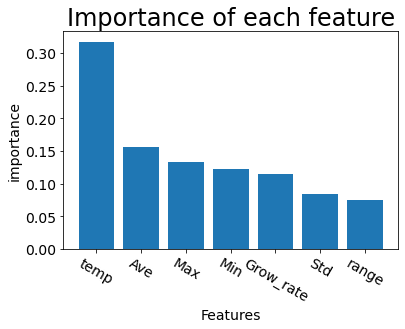

In [42]:
import matplotlib.pyplot as plt
x = [feat_labels[indices[0]],feat_labels[indices[1]],feat_labels[indices[2]],feat_labels[indices[3]],feat_labels[indices[4]],feat_labels[indices[5]],feat_labels[indices[6]]]
y=[importances[indices[0]],importances[indices[1]],importances[indices[2]],importances[indices[3]],importances[indices[4]],importances[indices[5]],importances[indices[6]]]

plt.bar(x,y)
plt.xticks( rotation=330)
#plt.hlines(0.13,-0.8,7, colors = "c", linestyles = "dashed")
plt.title('Importance of each feature',fontsize=24)
#设置图表标题和标题字号
plt.tick_params(axis='both',which='major',labelsize=14)
#设置刻度的字号
plt.xlabel('Features',fontsize=14)
#设置x轴标签及其字号
plt.ylabel('importance',fontsize=14)
#设置y轴标签及其字号

### 2.Sequential Forward Selection (SFS)

In [31]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# Sequential Forward Selection
col = ['Ave',	'Max',	'Min',	'range',	'Std',	'Grow_rate',	'temp']
knn = KNeighborsClassifier(n_neighbors=2)
sfs = SFS(knn, 
          k_features=4, 
          forward=True, 
          floating=False, 
          scoring='accuracy',
          cv=10,
          n_jobs=-1)
sfs = sfs.fit(X_zscores, Y)

print('\nBest 4 features selected by SFS:')
print(col[sfs.k_feature_idx_[0]],col[sfs.k_feature_idx_[1]],col[sfs.k_feature_idx_[2]],col[sfs.k_feature_idx_[3]])
print('CV Score:')
print(sfs.k_score_)


Best 4 features (k=4):
Ave Std Grow_rate temp
CV Score:
0.6362105711849957


### 3.Sequential Backward Selection (SBS)

In [32]:
# Sequential Backward Selection
sbs = SFS(knn, 
          k_features=4, 
          forward=False, 
          floating=False,  
          scoring='accuracy',
          cv=10,
          n_jobs=-1)
sbs = sbs.fit(X_zscores, Y)

print('\nBest 4 features selected by SBS:')
print(col[sbs.k_feature_idx_[0]],col[sbs.k_feature_idx_[1]],col[sbs.k_feature_idx_[2]],col[sbs.k_feature_idx_[3]])
print('CV Score:')
print(sbs.k_score_)


Best 4 features selected by SBS:
Max Std Grow_rate temp
CV Score:
0.6376811594202898


### 4.Sequential Float Foreward Selection (SFFS)

In [33]:
# Sequential Float Foreward Selection
sffs = SFS(knn, 
          k_features=4, 
          forward=True, 
          floating=True,  
          scoring='accuracy',
          cv=10,
          n_jobs=-1)
sffs = sffs.fit(X_zscores, Y)

print('\nBest 4 features selected by SFFS:')
print(col[sffs.k_feature_idx_[0]],col[sffs.k_feature_idx_[1]],col[sffs.k_feature_idx_[2]],col[sffs.k_feature_idx_[3]])
print('CV Score:')
print(sffs.k_score_)


Best 4 features selected by SFFS:
Ave Std Grow_rate temp
CV Score:
0.6362105711849957


### 5.Exhaustive Feature Selector

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
#  ExhaustiveFeatureSelector

knn = KNeighborsClassifier(n_neighbors=2)

efs1 = EFS(knn, 
           min_features=4,
           max_features=7,
           scoring='accuracy',
           print_progress=True,
           cv=10)

efs1 = efs1.fit(X_zscores, Y)

print('Best accuracy score: %.2f' % efs1.best_score_)
print('Best 4 features selected by EFS:', col[efs1.best_idx_[0]],col[efs1.best_idx_[1]],col[efs1.best_idx_[2]],col[efs1.best_idx_[3]])


Features: 64/64

Best accuracy score: 0.64
Best 4 features selected by EFS: Min Std Grow_rate temp


Summary results, 4 features (Mean, Max, Min, Temperature) are selected

In [22]:
X_feature = X_zscores[:,[0,1,2,5,6]]

PCA reduces feature dimension from 4D to 2D

In [23]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca=pca.fit(X_feature)
X_pca=pca.transform(X_feature)
X_pca

array([[-2.16614839,  0.16126054],
       [-2.0267178 , -0.49406776],
       [-2.09556065,  0.80849405],
       ...,
       [ 2.76762589, -0.20962982],
       [ 0.5979429 ,  0.53349244],
       [ 0.56813677,  2.53965011]])

## Classification 

### SVM

1) Test kernels

In [24]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score


# SVM
kfold = KFold(n_splits=10, shuffle=True,random_state=1)
accuracy_score_Records=[]
kernels=['linear','poly','rbf','sigmoid']
for kernel in kernels:  
    model = svm.SVC(kernel=kernel, degree=3,C =1)
    scores = cross_val_score(model, X_feature, Y, cv=kfold)
    accuracy_score_Records.append(scores.mean())
print(accuracy_score_Records)



[0.5118073316283034, 0.5410272804774083, 0.5745311167945439, 0.5191176470588236]


Performance of SVM

{'fit_time': array([0.02290988, 0.03587604, 0.02592993, 0.02892208, 0.03889966,
       0.02393508, 0.02592945, 0.02293754, 0.03291345, 0.02195835]), 'score_time': array([0.00900245, 0.00897789, 0.00698185, 0.00897765, 0.00997663,
       0.00797987, 0.00698209, 0.00897694, 0.00797725, 0.00696373]), 'test_precision_macro': array([0.54347826, 0.59947368, 0.62842105, 0.57947368, 0.47727273,
       0.61924119, 0.69047619, 0.70188679, 0.59090909, 0.35571055]), 'test_recall_macro': array([0.53885135, 0.58076923, 0.60356537, 0.56376689, 0.48008658,
       0.61785714, 0.69097222, 0.63896104, 0.58791209, 0.35571055]), 'test_f1_macro': array([0.53143483, 0.5728044 , 0.56660169, 0.54901961, 0.4657688 ,
       0.61840629, 0.69057421, 0.61363636, 0.58883721, 0.35294118])}
0.5745311167945439
 Prec: 0.5786 Rec: 0.5658 F1: 0.5550 Acc: 0.5745


C:\Users\hp\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


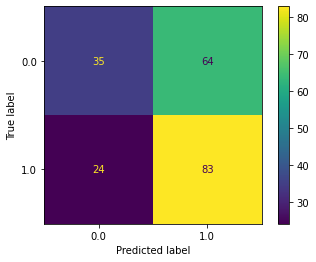

In [25]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
from sklearn.svm import SVC
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import KFold
import sklearn
X_train,X_test,y_train,y_test=train_test_split(X_feature,Y,test_size=0.3)
kfold = KFold(n_splits=10, shuffle=True,random_state=1)
scoring = ['precision_macro', 'recall_macro','f1_macro']
svm = svm.SVC(kernel='rbf', degree=3,C =1)
svm = svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)
scores = cross_validate(svm, X_feature,Y, scoring=scoring, cv=kfold, return_train_score=False)
print(scores)
sorted(scores.keys())
recall = scores['test_recall_macro'].mean()
precision = scores['test_precision_macro'].mean()
f1 = scores['test_f1_macro'].mean()
F1 = 2*recall*precision/(precision + recall)

scores_val = cross_val_score(svm, X_zscores[:,[0,1,2,5,6]],Y, cv=kfold)
print(scores_val.mean())

#prec, rec, f1, _ = precision_recall_fscore_support(y_test, y_pred, average="binary")

print(" Prec: %.4f Rec: %.4f F1: %.4f Acc: %.4f"%( precision, recall, f1,scores_val.mean()))

metrics.plot_confusion_matrix(svm, X_test, y_test)
plt.show()

Performance of SVM with PCA features

{'fit_time': array([0.02393484, 0.0249052 , 0.02094412, 0.02193975, 0.02393651,
       0.02293944, 0.02094412, 0.02094197, 0.02194619, 0.02094364]), 'score_time': array([0.01099896, 0.00997329, 0.00798035, 0.00698042, 0.0069809 ,
       0.00598335, 0.00797939, 0.00798035, 0.00897098, 0.00897527]), 'test_precision_macro': array([0.54444444, 0.60555556, 0.55779221, 0.60495283, 0.66071429,
       0.61550152, 0.73333333, 0.78688525, 0.56788247, 0.5326087 ]), 'test_recall_macro': array([0.53040541, 0.57307692, 0.53777589, 0.57516892, 0.59350649,
       0.60178571, 0.69444444, 0.60606061, 0.56135531, 0.52877071]), 'test_f1_macro': array([0.4998831 , 0.55483871, 0.4754025 , 0.55277778, 0.55164835,
       0.6012198 , 0.68864469, 0.53958333, 0.56108056, 0.52080018])}
0.5966751918158568
 Prec: 0.6210 Rec: 0.5802 F1: 0.5546 Acc: 0.5967


C:\Users\hp\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


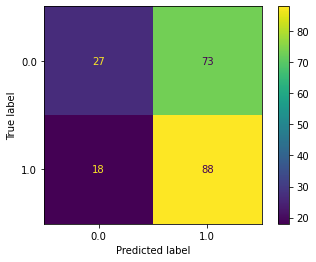

In [39]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
from sklearn.svm import SVC
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import KFold
import sklearn
X_train,X_test,y_train,y_test=train_test_split(X_pca,Y,test_size=0.3)
kfold = KFold(n_splits=10, shuffle=True,random_state=1)
scoring = ['precision_macro', 'recall_macro','f1_macro']
svm = svm.SVC(kernel='rbf', degree=3,C =1)
svm = svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)
scores = cross_validate(svm, X_pca,Y, scoring=scoring, cv=kfold, return_train_score=False)
print(scores)
sorted(scores.keys())
recall = scores['test_recall_macro'].mean()
precision = scores['test_precision_macro'].mean()
f1 = scores['test_f1_macro'].mean()
F1 = 2*recall*precision/(precision + recall)

scores_val = cross_val_score(svm, X_pca,Y, cv=kfold)
print(scores_val.mean())

#prec, rec, f1, _ = precision_recall_fscore_support(y_test, y_pred, average="binary")

print(" Prec: %.4f Rec: %.4f F1: %.4f Acc: %.4f"%( precision, recall, f1,scores_val.mean()))

metrics.plot_confusion_matrix(svm, X_test, y_test)
plt.show()

### KNN

1. Select best n_neighbors

In [ ]:
from sklearn import neighbors, datasets
result =[]
X_train,X_test,y_train,y_test=train_test_split(X_feature,Y,test_size=0.3)
#for i in (2,3,4,5,6,7,8,9,10):
for i in range(2,21,1):
    clf_kNN = neighbors.KNeighborsClassifier(n_neighbors=i, weights='distance')
    clf_kNN.fit(X_train, y_train)
    y_pred=clf_kNN.predict(X_test)
    kfold = KFold(n_splits=10, shuffle=True,random_state=1)
    scores = cross_val_score(clf_kNN, X_feature, Y, cv=kfold)
    #scores = accuracy_score(y_test, y_pred)
    result.append([i,scores.mean()])
result1 = sorted(result,key=lambda x:x[1],reverse= 1)
# print(scores)
for i in result1:
    print (i)
# print(f'kNN accuracy_score:{metrics.accuracy_score(y_test, y_pred)}')

Performance of KNN

{'fit_time': array([0.00195193, 0.00199842, 0.0009973 , 0.00099683, 0.0009973 ,
       0.00100088, 0.00199485, 0.00102258, 0.00099778, 0.00099683]), 'score_time': array([0.00401115, 0.0019908 , 0.00652695, 0.00199461, 0.00209665,
       0.00395298, 0.00500011, 0.00199533, 0.00419784, 0.00199485]), 'test_precision_macro': array([0.71080139, 0.69047619, 0.79827586, 0.80095819, 0.80113636,
       0.81785714, 0.75474255, 0.8378926 , 0.79719964, 0.69117647]), 'test_recall_macro': array([0.70439189, 0.68461538, 0.79371817, 0.79180743, 0.77532468,
       0.81785714, 0.74479167, 0.78874459, 0.80128205, 0.69267655])}
 Prec: 0.7701 Rec: 0.7595 F1: 0.7648 Acc: 0.7633


C:\Users\hp\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


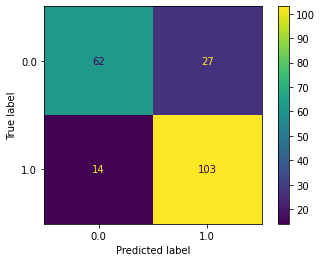

In [26]:
from sklearn import neighbors, datasets
from sklearn import metrics
X_train,X_test,y_train,y_test=train_test_split(X_feature,Y,test_size=0.3)
KNN = neighbors.KNeighborsClassifier(2, weights='distance')
scoring = ['precision_macro', 'recall_macro']
clf = KNN.fit(X_train, y_train)
y_pred = clf.predict(X_test)
kfold = KFold(n_splits=10, shuffle=True,random_state=1)
scores = cross_validate(KNN, X_feature,Y, scoring=scoring, cv=kfold, return_train_score=False)

print(scores)
sorted(scores.keys())
recall = scores['test_recall_macro'].mean()
precision = scores['test_precision_macro'].mean()
F1 = 2*recall*precision/(precision + recall)

scores_val = cross_val_score(KNN, X_feature,Y, cv=kfold)

print(" Prec: %.4f Rec: %.4f F1: %.4f Acc: %.4f"%( precision, recall, F1,scores_val.mean()))
metrics.plot_confusion_matrix(KNN, X_test, y_test)
plt.show()

Performance of KNN with PCA features

0.7252983802216539
{'fit_time': array([0.00102496, 0.0010004 , 0.00102544, 0.00099707, 0.00102544,
       0.00199628, 0.00099611, 0.0009892 , 0.00397038, 0.00099778]), 'score_time': array([0.00199437, 0.0029614 , 0.00299215, 0.00396132, 0.00296402,
       0.00401592, 0.0039618 , 0.0030098 , 0.0029912 , 0.00398922]), 'test_precision_macro': array([0.62051282, 0.69008621, 0.72727273, 0.76363636, 0.81209302,
       0.72710623, 0.72332016, 0.87534884, 0.71969697, 0.63235294]), 'test_recall_macro': array([0.61908784, 0.68846154, 0.72920204, 0.74493243, 0.79047619,
       0.72142857, 0.69618056, 0.84935065, 0.71245421, 0.63339146])}
 Prec: 0.7291 Rec: 0.7185 F1: 0.7238 Acc: 0.7253


C:\Users\hp\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


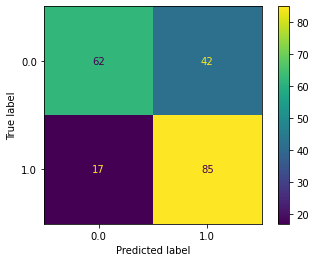

In [27]:
from sklearn import neighbors, datasets
from sklearn import metrics
X_train,X_test,y_train,y_test=train_test_split(X_pca,Y,test_size=0.3)
KNN = neighbors.KNeighborsClassifier(2, weights='distance')
scoring = ['precision_macro', 'recall_macro']
clf = KNN.fit(X_train, y_train)

y_pred = clf.predict(X_test)

kfold = KFold(n_splits=10, shuffle=True,random_state=1)
cv_cross = cross_validate(KNN, X_pca, Y, cv=kfold)
print(cv_cross['test_score'].mean())

scores = cross_validate(KNN, X_pca,Y, scoring=scoring, cv=kfold, return_train_score=False)

print(scores)
sorted(scores.keys())
recall = scores['test_recall_macro'].mean()
precision = scores['test_precision_macro'].mean()
F1 = 2*recall*precision/(precision + recall)

scores_val = cross_val_score(KNN, X_pca,Y, cv=kfold)
print(" Prec: %.4f Rec: %.4f F1: %.4f Acc: %.4f"%( precision, recall, F1,scores_val.mean()))
metrics.plot_confusion_matrix(KNN, X_test, y_test)
plt.show()

### RF

1. Select best n_estimators

In [ ]:
### select parameter in Random Forest roughly

scorel = []
kfold = KFold(n_splits=10, shuffle=True,random_state=1)
for i in range(1,501,10): # Iteratively build RF models containing 0-300 decision trees for comparison

 rfc = RandomForestClassifier(n_estimators=i,n_jobs=-1,random_state=1)
 score = cross_val_score(rfc,X_feature,Y,cv=kfold).mean()
 scorel.append(score)
print(f'{max(scorel)},the best n_estimators is {(scorel.index(max(scorel))*10)+1}')
# end=time.time()
# print('Running time: %s Seconds'%(end-start))
plt.figure(figsize=[20,5])
plt.plot(range(1,501,10),scorel)
plt.xlabel('n_estimators')
plt.ylabel('Score')
plt.show()


In [ ]:
# select specific value of best n_estimators

scorel = []
kfold = KFold(n_splits=10, shuffle=True,random_state=1)
for i in range(21,39):
 rfc = RandomForestClassifier(n_estimators=i,n_jobs=-1,random_state=1)
 score = cross_val_score(rfc,X_feature,Y,cv=kfold).mean()
 scorel.append(score)
print(max(scorel),([*range(1,21)][scorel.index(max(scorel))]))
plt.figure(figsize=[20,5])
plt.plot(range(21,39),scorel)
plt.xlabel('n_estimators')
plt.ylabel('Score')
plt.show()

In [30]:
X_feature.shape

(684, 5)

Performance of RF

{'fit_time': array([0.1436162 , 0.09974122, 0.11768603, 0.09075785, 0.08277965,
       0.0757978 , 0.06481457, 0.07878947, 0.06881618, 0.07280588]), 'score_time': array([0.006006  , 0.01195884, 0.01296544, 0.00797892, 0.0069797 ,
       0.00797915, 0.00698209, 0.00897527, 0.0079782 , 0.01097035]), 'test_precision_macro': array([0.82636364, 0.80905172, 0.80434783, 0.86851521, 0.8378926 ,
       0.77534884, 0.78030303, 0.82916667, 0.76697674, 0.76363636]), 'test_recall_macro': array([0.80320946, 0.80641026, 0.77334465, 0.84797297, 0.78874459,
       0.76428571, 0.75694444, 0.77359307, 0.76282051, 0.76547515])}
 Prec: 0.8062 Rec: 0.7843 F1: 0.7951 Acc: 0.7894


C:\Users\hp\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


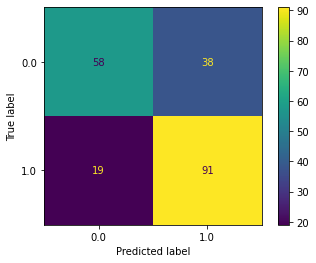

In [36]:
from sklearn.ensemble import RandomForestClassifier

X_train,X_test,y_train,y_test=train_test_split(X_feature,Y,test_size=0.3, random_state=0)
RF = RandomForestClassifier(n_estimators=32, random_state=1)
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)
#print(accuracy_score(y_test, y_pred))
#print(clf.predict(X_test))
kfold = KFold(n_splits=10, shuffle=True,random_state=1)
scoring = ['precision_macro', 'recall_macro']

#scores = cross_val_score(RF, X_feature, Y, cv=kfold)
y_pred = RF.predict(X_test)
scores = cross_validate(RF, X_feature,Y, scoring=scoring, cv=kfold, return_train_score=False)
print(scores)
sorted(scores.keys())
recall = scores['test_recall_macro'].mean()
precision = scores['test_precision_macro'].mean()
F1 = 2*recall*precision/(precision + recall)

scores_val = cross_val_score(RF, X_feature,Y, cv=kfold)


print(" Prec: %.4f Rec: %.4f F1: %.4f Acc: %.4f"%( precision, recall, F1,scores_val.mean()))

metrics.plot_confusion_matrix(RF, X_test, y_test)
plt.show()


Performance of RF with PCA features

{'fit_time': array([0.06581211, 0.06682324, 0.06482673, 0.06479311, 0.06585932,
       0.06379557, 0.0618341 , 0.06379461, 0.06386447, 0.06480122]), 'score_time': array([0.00699139, 0.00601053, 0.00798368, 0.00598407, 0.004987  ,
       0.00701499, 0.00897789, 0.00498652, 0.01093602, 0.00697994]), 'test_precision_macro': array([0.69482759, 0.73747764, 0.73217317, 0.82636364, 0.74604743,
       0.79356061, 0.69791667, 0.89772727, 0.81628788, 0.66176471]), 'test_recall_macro': array([0.69087838, 0.72692308, 0.73217317, 0.80320946, 0.71558442,
       0.77678571, 0.66493056, 0.86363636, 0.80586081, 0.663034  ])}
 Prec: 0.7604 Rec: 0.7443 F1: 0.7523 Acc: 0.7515


C:\Users\hp\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


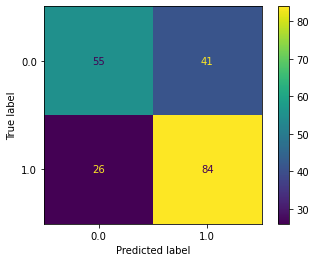

In [37]:
from sklearn.ensemble import RandomForestClassifier

X_train,X_test,y_train,y_test=train_test_split(X_pca,Y,test_size=0.3, random_state=0)
RF = RandomForestClassifier(n_estimators=32, random_state=1)
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)
#print(accuracy_score(y_test, y_pred))
#print(clf.predict(X_test))
kfold = KFold(n_splits=10, shuffle=True,random_state=1)
scoring = ['precision_macro', 'recall_macro']

scores = cross_val_score(RF, X_pca, Y, cv=kfold)
y_pred = RF.predict(X_test)
scores = cross_validate(RF, X_pca,Y, scoring=scoring, cv=kfold, return_train_score=False)
print(scores)
sorted(scores.keys())
recall = scores['test_recall_macro'].mean()
precision = scores['test_precision_macro'].mean()
F1 = 2*recall*precision/(precision + recall)

scores_val = cross_val_score(RF, X_pca,Y, cv=kfold)


print(" Prec: %.4f Rec: %.4f F1: %.4f Acc: %.4f"%( precision, recall, F1,scores_val.mean()))

metrics.plot_confusion_matrix(RF, X_test, y_test)
plt.show()

### Compare decision tree and Random Forest

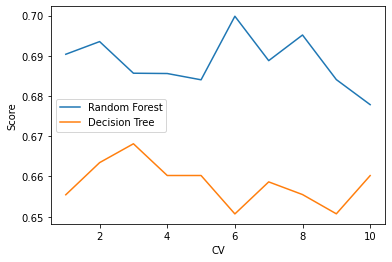

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
rfc_l = []
clf_l = []
for i in range(10):
 rfc = RandomForestClassifier()
 rfc_s = cross_val_score(rfc,X_feature,Y,cv=10).mean()
 rfc_l.append(rfc_s)
 clf = DecisionTreeClassifier()
 clf_s = cross_val_score(clf,X_feature,Y,cv=10).mean()
 clf_l.append(clf_s)
plt.plot(range(1,11),rfc_l,label = "Random Forest")
plt.plot(range(1,11),clf_l,label = "Decision Tree")
plt.xlabel('CV') # set x axis label for subplot 6
plt.ylabel('Score')
plt.legend()
plt.show()

### linear model

Performance of Linear model

In [38]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate
X_train,X_test,y_train,y_test=train_test_split(X_feature,Y,test_size=0.3, random_state=0)
def linear_score(true_value, predict):
    predict[predict < 0.5] = 0
    predict[predict > 0.5] = 1
    return predict[predict == true_value].size / predict.size

liner_model = LinearRegression()

scoring = {
    'linear_score': make_scorer(linear_score, greater_is_better=True)
}
kfold = KFold(n_splits=10, shuffle=True,random_state=1)
cv_cross = cross_validate(liner_model, X_feature, Y, cv=kfold, scoring=scoring)
liner_model.fit(X_train,y_train)
y_pred = liner_model.predict(X_test)
a = len(y_pred)
y_pre = []
for n in range(0,a,1):
    if y_pred[n] > 0.5:
        y_pre.append(1) 
    else:
        y_pre.append(0)

print(confusion_matrix( y_test, y_pre))


print(cv_cross['test_linear_score'].mean()) # Average of Cross-validation
print(cv_cross['test_linear_score'].std()) #  Standard deviation of Cross-validation
cv_cross



[[35 61]
 [35 75]]
0.5089727195225916
0.06391982176094524


{'fit_time': array([0.26229787, 0.00099826, 0.00099659, 0.00099826, 0.00099683,
        0.00598478, 0.        , 0.00099802, 0.00099683, 0.00099778]),
 'score_time': array([0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.0009973, 0.       , 0.       , 0.       ]),
 'test_linear_score': array([0.52173913, 0.49275362, 0.4057971 , 0.47826087, 0.51470588,
        0.63235294, 0.5       , 0.52941176, 0.58823529, 0.42647059])}

Performance of Linear model with PCA features

In [60]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate
X_train,X_test,y_train,y_test=train_test_split(X_pca,Y,test_size=0.3, random_state=0)
def linear_score(true_value, predict):
    predict[predict < 0.5] = 0
    predict[predict > 0.5] = 1
    return predict[predict == true_value].size / predict.size

liner_model = LinearRegression()

scoring = {
    'linear_score': make_scorer(linear_score, greater_is_better=True)
}
kfold = KFold(n_splits=10, shuffle=True,random_state=1)
cv_cross = cross_validate(liner_model, X_pca, Y, cv=kfold, scoring=scoring)
liner_model.fit(X_train,y_train)
y_pred = liner_model.predict(X_test)
a = len(y_pred)
y_pre = []
for n in range(0,a,1):
    if y_pred[n] > 0.5:
        y_pre.append(1) 
    else:
        y_pre.append(0)

print(confusion_matrix( y_test, y_pre))


print(cv_cross['test_linear_score'].mean()) # Average of Cross-validation
print(cv_cross['test_linear_score'].std()) # Standard deviation of Cross-validation
cv_cross

[[43 53]
 [32 78]]
0.5614876385336742
0.035779007327939885


{'fit_time': array([0.00099754, 0.00099683, 0.00099778, 0.        , 0.0009985 ,
        0.00099683, 0.00398827, 0.00099778, 0.0009973 , 0.        ]),
 'score_time': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'test_linear_score': array([0.53623188, 0.60869565, 0.53623188, 0.50724638, 0.57352941,
        0.63235294, 0.52941176, 0.57352941, 0.55882353, 0.55882353])}

### Naive Bayes

Performance of Naive Bayes

0.5584825234441603
{'fit_time': array([0.00199533, 0.00099802, 0.00099444, 0.        , 0.0009985 ,
       0.0009973 , 0.00099587, 0.00198984, 0.00101805, 0.0039959 ]), 'score_time': array([0.00199413, 0.00399017, 0.00199366, 0.00199628, 0.00199223,
       0.00299382, 0.00399423, 0.00199509, 0.00197363, 0.00298572]), 'test_precision_macro': array([0.53571429, 0.60086207, 0.59008621, 0.51103565, 0.55930736,
       0.52829355, 0.59275362, 0.6622807 , 0.58093023, 0.51255814]), 'test_recall_macro': array([0.53589527, 0.6       , 0.58870968, 0.51097973, 0.55930736,
       0.52857143, 0.58333333, 0.66017316, 0.57967033, 0.51176983])}
 Prec: 0.5674 Rec: 0.5658 F1: 0.5666 Acc: 0.5585


C:\Users\hp\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


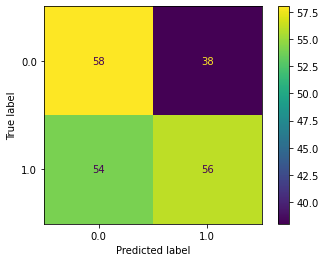

In [39]:

from sklearn.naive_bayes import GaussianNB

NB = GaussianNB(var_smoothing=1e-8)
NB.fit(X_train, y_train)
kfold = KFold(n_splits=10, shuffle=True,random_state=1)
cv_cross = cross_validate(NB, X_feature, Y, cv=kfold)
print(cv_cross['test_score'].mean())


scoring = ['precision_macro', 'recall_macro']
#scores = cross_val_score(NB, X_zscores[:,[1,2,3,6]], Y, cv=10)
y_pred = NB.predict(X_test)
scores = cross_validate(NB, X_feature,Y, scoring=scoring, cv=kfold, return_train_score=False)
print(scores)
sorted(scores.keys())
recall = scores['test_recall_macro'].mean()
precision = scores['test_precision_macro'].mean()
F1 = 2*recall*precision/(precision + recall)

scores_val = cross_val_score(NB, X_feature,Y, cv=kfold)


print(" Prec: %.4f Rec: %.4f F1: %.4f Acc: %.4f"%( precision, recall, F1,scores_val.mean()))


metrics.plot_confusion_matrix(NB, X_test, y_test)
plt.show()

Performance of Naive Bayes with PCA features

0.5600170502983801
{'fit_time': array([0.0009973 , 0.00099826, 0.        , 0.00099683, 0.00102472,
       0.00099611, 0.00099802, 0.00199342, 0.00099683, 0.00099754]), 'score_time': array([0.00199485, 0.00307059, 0.00199389, 0.00299287, 0.00199461,
       0.00199485, 0.00396276, 0.00199509, 0.00099683, 0.00199437]), 'test_precision_macro': array([0.54497354, 0.58194444, 0.62061404, 0.50464527, 0.57575758,
       0.57894737, 0.51923077, 0.70725995, 0.55178571, 0.59912281]), 'test_recall_macro': array([0.54307432, 0.57564103, 0.57003396, 0.50464527, 0.56926407,
       0.58035714, 0.51388889, 0.57662338, 0.55311355, 0.59851787])}
 Prec: 0.5784 Rec: 0.5585 F1: 0.5683 Acc: 0.5600


C:\Users\hp\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


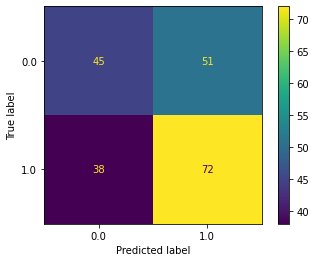

In [63]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB(var_smoothing=1e-8)
NB.fit(X_train, y_train)
kfold = KFold(n_splits=10, shuffle=True,random_state=1)
cv_cross = cross_validate(NB, X_pca, Y, cv=kfold)
print(cv_cross['test_score'].mean())


scoring = ['precision_macro', 'recall_macro']
#scores = cross_val_score(NB, X_zscores[:,[1,2,3,6]], Y, cv=10)
y_pred = NB.predict(X_test)
scores = cross_validate(NB, X_pca,Y, scoring=scoring, cv=kfold, return_train_score=False)
print(scores)
sorted(scores.keys())
recall = scores['test_recall_macro'].mean()
precision = scores['test_precision_macro'].mean()
F1 = 2*recall*precision/(precision + recall)

scores_val = cross_val_score(NB, X_pca,Y, cv=kfold)


print(" Prec: %.4f Rec: %.4f F1: %.4f Acc: %.4f"%( precision, recall, F1,scores_val.mean()))


metrics.plot_confusion_matrix(NB, X_test, y_test)
plt.show()

### GBDT

Performance of GBDT

训练集精确度:  0.9916317991631799
测试集精确度:  0.7766990291262136
Acc:  0.7849957374254048
{'fit_time': array([5.2180016 , 5.23090601, 4.91430378, 5.12180424, 4.9825511 ,
       4.98666525, 4.85505056, 4.84903407, 4.97666717, 4.8749969 ]), 'score_time': array([0.01393533, 0.01099801, 0.01204109, 0.0119679 , 0.01296496,
       0.01097083, 0.01193666, 0.00997424, 0.00897408, 0.00994182]), 'test_precision_macro': array([0.85430743, 0.84259259, 0.78789199, 0.86025145, 0.8378926 ,
       0.83860465, 0.76785714, 0.75748792, 0.86811594, 0.69912281]), 'test_recall_macro': array([0.85430743, 0.83205128, 0.78056027, 0.81461149, 0.78874459,
       0.825     , 0.76041667, 0.73073593, 0.8489011 , 0.69790759])}
 Prec: 0.8114 Rec: 0.7933 F1: 0.8023 Acc: 0.7967


C:\Users\hp\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


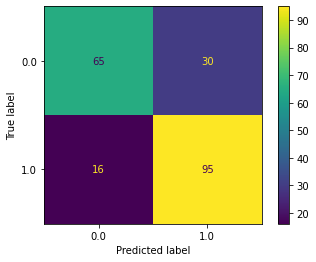

In [40]:

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from time import time
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn import metrics
X_train,X_test,y_train,y_test=train_test_split(X_feature,Y,test_size=0.3)
idx=[]
m, n = np.shape(X_train)
idx = list(range(m))
np.random.shuffle(idx)

GBDT = GradientBoostingClassifier(max_features=4, max_depth=50, min_samples_split=8, min_samples_leaf=3,
    
                            n_estimators=1200, learning_rate=0.05, subsample=0.95)
# fit training set
GBDT.fit(X_train, y_train)

train_Y_hat = GBDT.predict(X_train)
print ("训练集精确度: ", accuracy_score(y_train, train_Y_hat))   
# predict testing set
test_Y_hat = GBDT.predict(X_test)
print ("测试集精确度: ", accuracy_score(y_test, test_Y_hat))

kfold = KFold(n_splits=10, shuffle=True,random_state=1)
cv_cross = cross_validate(GBDT, X_feature, Y, cv=kfold)
print("Acc: ",cv_cross['test_score'].mean())

scoring = ['precision_macro', 'recall_macro']

y_pred = GBDT.predict(X_test)
scores = cross_validate(GBDT, X_feature,Y, scoring=scoring, cv=kfold, return_train_score=False)
print(scores)
sorted(scores.keys())
recall = scores['test_recall_macro'].mean()
precision = scores['test_precision_macro'].mean()

F1 = 2*recall*precision/(precision + recall)

scores_val = cross_val_score(GBDT, X_feature,Y, cv=kfold)


print(" Prec: %.4f Rec: %.4f F1: %.4f Acc: %.4f"%( precision, recall, F1,scores_val.mean()))

metrics.plot_confusion_matrix(GBDT, X_test, y_test)
plt.show()



Performance of GBDT with PCA features

训练集精确度:  0.9937238493723849
测试集精确度:  0.7330097087378641
Acc:  0.7807118499573742
{'fit_time': array([4.68446589, 4.82110596, 4.71342826, 4.87403631, 4.67353034,
       4.64155912, 4.68848753, 4.57579637, 4.83905673, 4.78375459]), 'score_time': array([0.01097608, 0.01196837, 0.01193428, 0.01000619, 0.01094198,
       0.00898361, 0.0119338 , 0.01096463, 0.01097465, 0.01097107]), 'test_precision_macro': array([0.7974359 , 0.755     , 0.76788909, 0.8137931 , 0.78046512,
       0.77232538, 0.79821429, 0.8655303 , 0.85573123, 0.83534884]), 'test_recall_macro': array([0.79391892, 0.73974359, 0.75424448, 0.80743243, 0.76103896,
       0.775     , 0.78993056, 0.83419913, 0.82967033, 0.81429817])}
 Prec: 0.8042 Rec: 0.7899 F1: 0.7970 Acc: 0.7881


C:\Users\hp\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


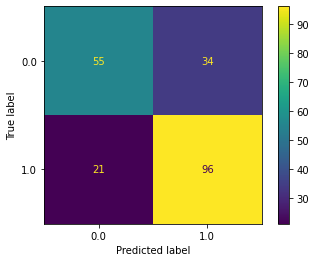

In [66]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from time import time
import numpy as np
from sklearn.model_selection import cross_validate
idx=[]
m, n = np.shape(X_train)
idx = list(range(m))
np.random.shuffle(idx)
X_train,X_test,y_train,y_test=train_test_split(X_pca,Y,test_size=0.3)
GBDT = GradientBoostingClassifier(max_features=2, max_depth=50, min_samples_split=8, min_samples_leaf=3,
    
                            n_estimators=1200, learning_rate=0.05, subsample=0.95)
# fit training set
GBDT.fit(X_train, y_train)

train_Y_hat = GBDT.predict(X_train)
print ("Accuracy in training set: ", accuracy_score(y_train, train_Y_hat))   
# Predict testing set
test_Y_hat = GBDT.predict(X_test)
print ("Accuracy in testing set: ", accuracy_score(y_test, test_Y_hat))

kfold = KFold(n_splits=10, shuffle=True,random_state=1)
cv_cross = cross_validate(GBDT, X_pca, Y, cv=kfold)
print("Acc: ",cv_cross['test_score'].mean())

scoring = ['precision_macro', 'recall_macro']

y_pred = GBDT.predict(X_test)
scores = cross_validate(GBDT, X_pca,Y, scoring=scoring, cv=kfold, return_train_score=False)
print(scores)
sorted(scores.keys())
recall = scores['test_recall_macro'].mean()
precision = scores['test_precision_macro'].mean()

F1 = 2*recall*precision/(precision + recall)

scores_val = cross_val_score(GBDT, X_pca,Y, cv=kfold)


print(" Prec: %.4f Rec: %.4f F1: %.4f Acc: %.4f"%( precision, recall, F1,scores_val.mean()))

metrics.plot_confusion_matrix(GBDT, X_test, y_test)
plt.show()


### AdaBoost

Performance of AdaBoost

0.6813512361466325
{'fit_time': array([0.18392491, 0.22567749, 0.21074605, 0.18764353, 0.18881035,
       0.22736454, 0.20543742, 0.18952012, 0.19946671, 0.18749857]), 'score_time': array([0.02007079, 0.02194118, 0.01997328, 0.02091217, 0.02093768,
       0.01994729, 0.02292466, 0.02291179, 0.01994681, 0.02194118]), 'test_precision_macro': array([0.6206446 , 0.70972222, 0.65608466, 0.71212121, 0.67654752,
       0.71447254, 0.66277056, 0.74254743, 0.74675325, 0.58701299]), 'test_recall_macro': array([0.61697635, 0.69358974, 0.65025467, 0.71283784, 0.67532468,
       0.71964286, 0.66319444, 0.73246753, 0.76098901, 0.58761988])}
 Prec: 0.6829 Rec: 0.6813 F1: 0.6821 Acc: 0.6814


C:\Users\hp\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


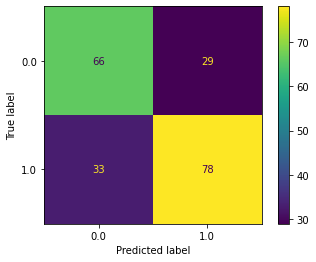

In [41]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
 
Ada = AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
        learning_rate=1.0, n_estimators=100, random_state=0)
Ada.fit(X_train, y_train)
kfold = KFold(n_splits=10, shuffle=True,random_state=1)
cv_cross = cross_validate(Ada, X_feature, Y, cv=kfold)
print(cv_cross['test_score'].mean() )


scoring = ['precision_macro', 'recall_macro']

y_pred = Ada.predict(X_test)
scores = cross_validate(Ada, X_feature,Y, scoring=scoring, cv=kfold, return_train_score=False)
print(scores)
sorted(scores.keys())
recall = scores['test_recall_macro'].mean()
precision = scores['test_precision_macro'].mean()

F1 = 2*recall*precision/(precision + recall)

scores_val = cross_val_score(Ada, X_feature,Y, cv=kfold)


print(" Prec: %.4f Rec: %.4f F1: %.4f Acc: %.4f"%( precision, recall, F1,scores_val.mean()))


metrics.plot_confusion_matrix(Ada, X_test, y_test)
plt.show()


Performance of AdaBoost with PCA features

0.6374467178175618
{'fit_time': array([0.1824789 , 0.2193799 , 0.1944797 , 0.17791033, 0.19764185,
       0.19263434, 0.18883467, 0.19956517, 0.19372034, 0.19677925]), 'score_time': array([0.02297163, 0.0209446 , 0.0191009 , 0.02290964, 0.02191448,
       0.01991367, 0.02606583, 0.02094412, 0.02293921, 0.02712393]), 'test_precision_macro': array([0.54409091, 0.72363636, 0.68650794, 0.59078712, 0.55906977,
       0.54912281, 0.67534722, 0.80113636, 0.64046512, 0.59912281]), 'test_recall_macro': array([0.54096284, 0.71025641, 0.6795416 , 0.58572635, 0.55497835,
       0.55      , 0.67534722, 0.77532468, 0.63827839, 0.59851787])}
 Prec: 0.6369 Rec: 0.6309 F1: 0.6339 Acc: 0.6374


C:\Users\hp\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


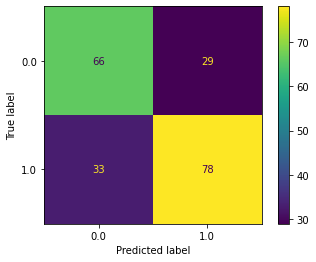

In [42]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

#clf = AdaBoostClassifier(n_estimators=100, random_state=0)
 
Ada = AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
        learning_rate=1.0, n_estimators=100, random_state=0)
Ada.fit(X_train, y_train)
kfold = KFold(n_splits=10, shuffle=True,random_state=1)
cv_cross = cross_validate(Ada, X_pca, Y, cv=kfold)
print(cv_cross['test_score'].mean() )


scoring = ['precision_macro', 'recall_macro']
#scores = cross_val_score(NB, X_zscores[:,[1,2,3,6]], Y, cv=10)
y_pred = Ada.predict(X_test)
scores = cross_validate(Ada, X_pca,Y, scoring=scoring, cv=kfold, return_train_score=False)
print(scores)
sorted(scores.keys())
recall = scores['test_recall_macro'].mean()
precision = scores['test_precision_macro'].mean()

F1 = 2*recall*precision/(precision + recall)

scores_val = cross_val_score(Ada, X_pca,Y, cv=kfold)


print(" Prec: %.4f Rec: %.4f F1: %.4f Acc: %.4f"%( precision, recall, F1,scores_val.mean()))


metrics.plot_confusion_matrix(Ada, X_test, y_test)
plt.show()